In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import torch

from mfbml.methods.mfdnnbnn import MFDNNBNN
from mfbml.problem_sets.torch_problems import Forrester1b, MengCase1

In [2]:
# define function
func = MengCase1(noise_std=0.05)
num_dim = 1

# use multi-fidelity forrester function to test the performance of the MFDNNBNN class
lf_samples = torch.linspace(0, 1, 201).reshape(-1, 1)
hf_samples = lf_samples[::10]  # sample every 5 points


# generate responses
lf_responses = func.lf(lf_samples)
hf_responses = func.hf(hf_samples)

In [3]:

# create the configuration of the low-fidelity model
lf_configure = {"in_features": 1,
                "hidden_features": [20, 20],
                "out_features": 1,
                "activation": "Tanh",
                "optimizer": "Adam",
                "lr": 0.001,
                "weight_decay": 0.000001,
                "loss": "mse"}
# create the configuration of the high-fidelity model
hf_configure = {"in_features": 1,
                "hidden_features": [50, 50],
                "out_features": 1,
                "activation": "Tanh",
                "lr": 0.001,
                "sigma": 0.05}
# create the MFDNNBNN object
mfdnnbnn = MFDNNBNN(lf_configure=lf_configure,
                    hf_configure=hf_configure,
                    beta_optimize=False,
                    beta_bounds=[-5, 5])


samples = {"lf": lf_samples,
           "hf": hf_samples}

responses = {"lf": lf_responses,
             "hf": hf_responses}

# lf train config
lf_train_config = {"batch_size": None,
                   "num_epochs": 20000,
                   "print_iter": 100}
hf_train_config = {"num_epochs": 50000,
                   "sample_freq": 100,
                   "print_info": True,
                   "burn_in_epochs": 20000}

# train the MFDNNBNN object
mfdnnbnn.train(samples=samples,
               responses=responses,
               lf_train_config=lf_train_config,
               hf_train_config=hf_train_config
               )
# predict the MFDNNBNN object
y, epistemic, total_unc, aleatoric = mfdnnbnn.predict(
    x=torch.linspace(0, 1, 1000).reshape(-1, 1))
# lf prediction
lf_y = mfdnnbnn.lf_model.forward(
    torch.linspace(0, 1, 1000).reshape(-1, 1))

epoch:  99 loss:  0.4835364818572998
epoch:  199 loss:  0.48343247175216675
epoch:  299 loss:  0.4833199679851532
epoch:  399 loss:  0.4832060635089874
epoch:  499 loss:  0.4830893278121948
epoch:  599 loss:  0.4829605519771576
epoch:  699 loss:  0.4827970564365387
epoch:  799 loss:  0.4824688136577606
epoch:  899 loss:  0.4804641902446747
epoch:  999 loss:  0.471429705619812
epoch:  1099 loss:  0.45392370223999023
epoch:  1199 loss:  0.4367736279964447
epoch:  1299 loss:  0.4239354729652405
epoch:  1399 loss:  0.41084831953048706
epoch:  1499 loss:  0.3945208191871643
epoch:  1599 loss:  0.3744557797908783
epoch:  1699 loss:  0.32248151302337646
epoch:  1799 loss:  0.2429649829864502
epoch:  1899 loss:  0.13240136206150055
epoch:  1999 loss:  0.042367782443761826
epoch:  2099 loss:  0.018839223310351372
epoch:  2199 loss:  0.014074773527681828
epoch:  2299 loss:  0.011690494604408741
epoch:  2399 loss:  0.009919763542711735
epoch:  2499 loss:  0.008529143407940865
epoch:  2599 loss:  

/home/yaga/Documents/mfbml/mfbml/methods/bnn.py:170: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1519.)
  V.mul_(alpha).addcmul_(1 - alpha, d_p, d_p)


epoch:   101/50000
nll_loss: 2576.742, prior_loss: 2540.618, total: 5117.361
noise: 0.050
epoch:   201/50000
nll_loss: 2585.437, prior_loss: 2570.039, total: 5155.475
noise: 0.050
epoch:   301/50000
nll_loss: 2578.294, prior_loss: 2595.408, total: 5173.701
noise: 0.050
epoch:   401/50000
nll_loss: 2570.818, prior_loss: 2624.853, total: 5195.670
noise: 0.050
epoch:   501/50000
nll_loss: 2571.707, prior_loss: 2648.492, total: 5220.199
noise: 0.050
epoch:   601/50000
nll_loss: 2576.228, prior_loss: 2681.545, total: 5257.773
noise: 0.050
epoch:   701/50000
nll_loss: 2566.589, prior_loss: 2711.009, total: 5277.597
noise: 0.050
epoch:   801/50000
nll_loss: 2561.198, prior_loss: 2744.274, total: 5305.472
noise: 0.050
epoch:   901/50000
nll_loss: 2561.052, prior_loss: 2781.699, total: 5342.750
noise: 0.050
epoch:  1001/50000
nll_loss: 2557.022, prior_loss: 2810.385, total: 5367.408
noise: 0.050
epoch:  1101/50000
nll_loss: 2555.368, prior_loss: 2854.697, total: 5410.064
noise: 0.050
epoch:  12

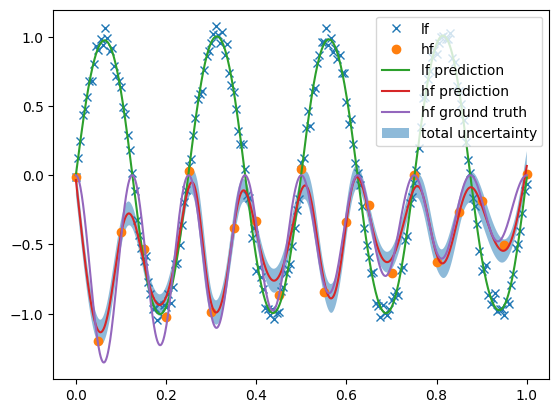

In [4]:
# print the prediction

# plot

plt.figure()
plt.plot(lf_samples, lf_responses, 'x', label="lf")
plt.plot(hf_samples, hf_responses, 'o', label="hf")
# plot lf prediction
plt.plot(torch.linspace(0, 1, 1000).numpy(),
         lf_y.detach().numpy(), label="lf prediction")
plt.plot(torch.linspace(0, 1, 1000).numpy(), y, label="hf prediction")
plt.plot(torch.linspace(0, 1, 1000).numpy(), func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(), label="hf ground truth")
plt.fill_between(torch.linspace(0, 1, 1000).numpy(),
                 (y - 2*epistemic).reshape(-1),
                 (y + 2*epistemic).reshape(-1),
                 alpha=0.5,
                 label="total uncertainty")
plt.legend()
# plt.savefig("mfdnnbnn.png", bbox_inches='tight', dpi=300)
plt.show()

In [5]:
# train a standard bnn to fit the data
from mfbml.methods.bnn import BNNWrapper


# create the model
model = BNNWrapper(in_features=1,
                   hidden_features=[50, 50],
                   out_features=1,
                   activation="Tanh",
                   lr=0.001,
                   sigma=0.05)


# train the model
model.train(x=hf_samples,
            y=hf_responses,
            num_epochs=50000,
            sample_freq=100,
            burn_in_epochs=20000)

epoch:     1/50000
nll_loss: 3080.995, prior_loss: 2507.035, total: 5588.030
noise: 0.050
epoch:   101/50000
nll_loss: 481.757, prior_loss: 2531.942, total: 3013.698
noise: 0.050
epoch:   201/50000
nll_loss: 481.186, prior_loss: 2560.730, total: 3041.916
noise: 0.050
epoch:   301/50000
nll_loss: 478.804, prior_loss: 2586.306, total: 3065.110
noise: 0.050
epoch:   401/50000
nll_loss: 476.158, prior_loss: 2618.672, total: 3094.830
noise: 0.050
epoch:   501/50000
nll_loss: 489.072, prior_loss: 2652.481, total: 3141.554
noise: 0.050
epoch:   601/50000
nll_loss: 478.040, prior_loss: 2683.650, total: 3161.690
noise: 0.050
epoch:   701/50000
nll_loss: 475.076, prior_loss: 2716.736, total: 3191.812
noise: 0.050
epoch:   801/50000
nll_loss: 483.857, prior_loss: 2743.278, total: 3227.135
noise: 0.050
epoch:   901/50000
nll_loss: 474.558, prior_loss: 2780.866, total: 3255.424
noise: 0.050
epoch:  1001/50000
nll_loss: 474.408, prior_loss: 2823.119, total: 3297.527
noise: 0.050
epoch:  1101/50000
n

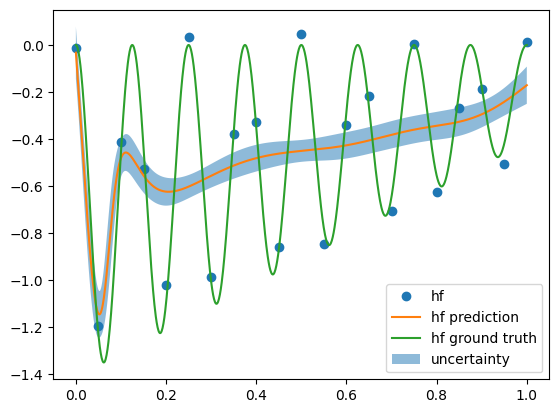

In [6]:
# predict the model
bnn_y, bnn_epistemic, bnn_total_unc, bnn_aleatoric = model.predict(
    x=torch.linspace(0, 1, 1000).reshape(-1, 1))

# plot
plt.figure()
plt.plot(hf_samples, hf_responses, 'o', label="hf")
plt.plot(torch.linspace(0, 1, 1000).numpy(), bnn_y, label="hf prediction")
plt.plot(torch.linspace(0, 1, 1000).numpy(), func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(),  label="hf ground truth")
plt.fill_between(torch.linspace(0, 1, 1000).numpy(),
                 (bnn_y - 2*bnn_epistemic).reshape(-1),
                 (bnn_y + 2*bnn_epistemic).reshape(-1),
                 alpha=0.5,
                 label="uncertainty")
plt.legend()
# plt.savefig("bnn.png", bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# try to get the accuracy metrics of the two models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# for mfdnnbnn
print("mfdnnbnn")
print("mse: ", mean_squared_error(func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(), y))
print("r2: ", r2_score(func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(), y))
print("mae: ", mean_absolute_error(func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(), y))

# for bnn
print("bnn")
print("mse: ", mean_squared_error(func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(), bnn_y))
print("r2: ", r2_score(func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(), bnn_y))
print("mae: ", mean_absolute_error(func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.0).detach().numpy(), bnn_y))

mfdnnbnn
mse:  0.016614297122294185
r2:  0.8773179328192952
mae:  0.10118422070765584
bnn
mse:  0.09283038
r2:  0.3145287568996712
mae:  0.26314253


In [11]:
def nog_likelihood_function(pred: np.ndarray,
                            real: np.ndarray,
                            sigma: np.ndarray,) -> np.ndarray:

    # calculate the negative log likelihood
    # pred: the predicted mean
    # real: the real value
    # sigma: the predicted standard deviation
    # return: the negative log likelihood

    # calculate the log likelihood
    nll = -0.5 * np.log(2 * np.pi * sigma**2) - \
        0.5 * ((real - pred) / sigma)**2

    return nll.sum()

In [19]:
# calculate the negative log likelihood
print("mfdnnbnn")
print("nll: ", nog_likelihood_function(y, func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.05).detach().numpy(), total_unc))
print("bnn")
print("nll: ", nog_likelihood_function(bnn_y, func.hf(torch.linspace(
    0, 1, 1000).reshape(-1, 1), noise_hf=0.05).detach().numpy(), bnn_total_unc))

mfdnnbnn
nll:  -415.40686574254596
bnn
nll:  -11977.981


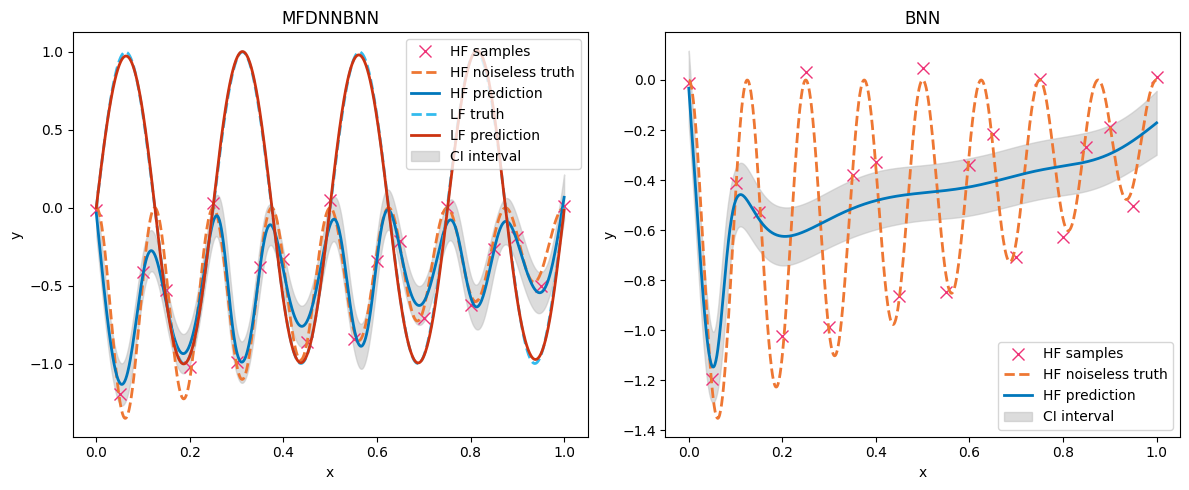

In [13]:
# plot results of mfrbfgp and gpr in one figure
test_x = torch.linspace(0, 1, 1000).reshape(-1, 1).numpy()
test_hy = func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1),
                  noise_hf=0.0).detach().numpy()
test_ly = func.lf(torch.linspace(0, 1, 1000).reshape(-1, 1),
                  noise_lf=0.0).detach().numpy()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(
    samples["hf"].numpy(),
    responses["hf"].numpy(),
    "x",
    color="#EE3377",
    linewidth=2,
    markersize=8,
    label="HF samples",
)
ax[0].plot(
    test_x, test_hy, "--", color="#EE7733", linewidth=2, label="HF noiseless truth"
)
ax[0].plot(
    test_x, y, "-", color="#0077BB", linewidth=2, label="HF prediction"
)
ax[0].plot(test_x, test_ly, "--", color="#33BBEE",
           linewidth=2, label="LF truth")
ax[0].plot(test_x, lf_y.detach().numpy(), "-", color="#CC3311",
           linewidth=2, label="LF prediction")
# ax[0].plot(sample_x["lf"], sample_y["lf"], "x", label="lf samples")
ax[0].fill_between(
    test_x.flatten(),
    (y - 2 * total_unc).flatten(),
    (y + 2 * total_unc).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[0].legend()
ax[0].set_title("MFDNNBNN")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
# for gpr
ax[1].plot(
    samples["hf"].numpy(),
    responses["hf"].numpy(),
    "x",
    color="#EE3377",
    linewidth=2,
    markersize=8,
    label="HF samples",
)
ax[1].plot(
    test_x, test_hy, "--", color="#EE7733", linewidth=2, label="HF noiseless truth"
)
ax[1].plot(test_x, bnn_y, "-", color="#0077BB",
           linewidth=2, label="HF prediction")
ax[1].fill_between(
    test_x.flatten(),
    (bnn_y - 2 * bnn_total_unc).flatten(),
    (bnn_y + 2 * bnn_total_unc).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[1].legend()
ax[1].set_title("BNN")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
plt.tight_layout()
plt.savefig("mf_dnn_bnn_known_noise_forrester.pdf",
            dpi=300, bbox_inches="tight")
plt.show()